In [1]:
import pandas as pd

# Data Science Lifecycle
## 1.

In [2]:
df = pd.read_csv('csv/churn.csv')

In [5]:
df.head(4)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [6]:
df.shape

(10000, 13)

In [8]:
# EDA and cleaning

In [10]:
#descriptive stats

In [11]:
# Univariate analysis

In [12]:
# Measure of sentral tendency --> mean , median , mode 

In [13]:
df['CreditScore'].median()

np.float64(652.0)

In [16]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='CreditScore', ylabel='Density'>

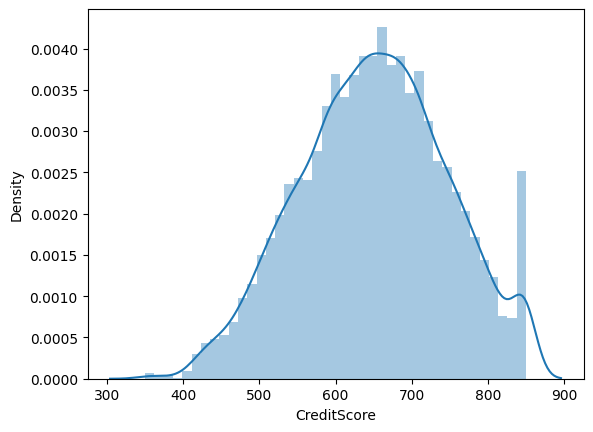

In [17]:
sns.distplot(df['CreditScore'])

In [18]:
#measure of dispurtion --> range,variance,standard deviation, quartiles

In [20]:
df['CreditScore'].min()
df['CreditScore'].var()
df['CreditScore'].std()

np.float64(96.65329873613035)

In [22]:
df['CreditScore'].quantile(0.25) #25 percent of people have credits less than 

np.float64(584.0)

In [24]:
df['Geography'].unique()

<StringArray>
['France', 'Spain', 'Germany']
Length: 3, dtype: str

In [25]:
df['Geography'].nunique()

3

In [26]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: ylabel='CreditScore'>

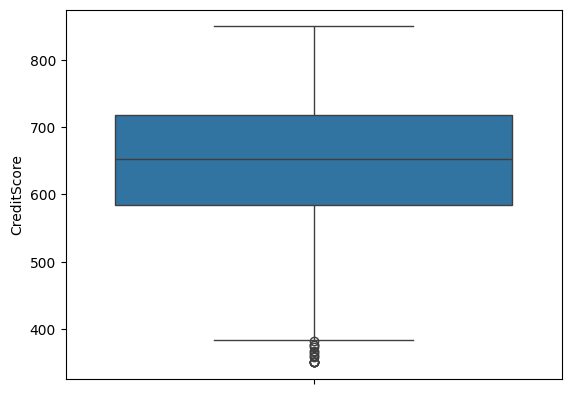

In [21]:
sns.boxplot(df['CreditScore'])

<Axes: xlabel='Geography', ylabel='count'>

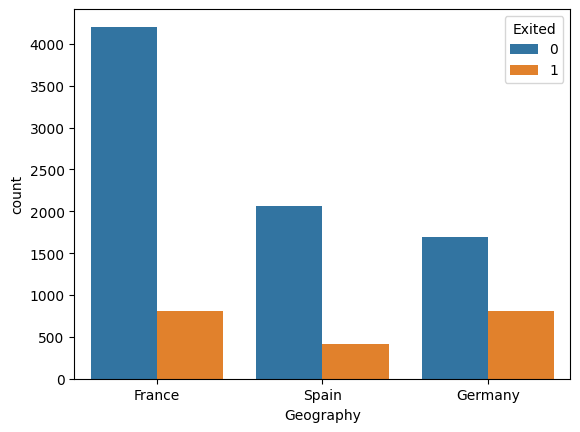

In [29]:
sns.countplot(x= df['Geography'],hue= df['Exited'])

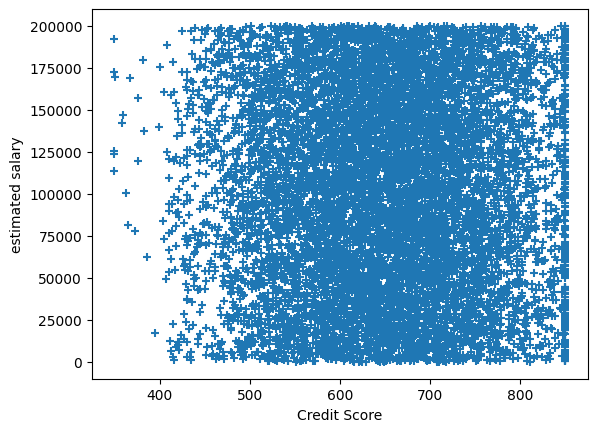

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Credit Score')
plt.ylabel('estimated salary')
plt.scatter(df.CreditScore,df.EstimatedSalary,marker='+')


In [32]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  str    
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  str    
 4   Gender           10000 non-null  str    
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), str(3)
memory usage: 1015.8 KB


In [37]:
round(df.iloc[:,2:].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
Exited,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


# Data manipulation 

In [62]:
df.groupby('Geography').Balance.mean()

In [43]:
df.groupby('Geography').agg({'EstimatedSalary':['mean','std'],
                            'Exited':'mean','Balance':['min','max','mean','std']})

EstimatedSalary                  Exited   Balance             \
                     mean           std      mean       min        max   
Geography                                                                
France       99899.180814  57336.289016  0.161548      0.00  238387.56   
Germany     101113.435102  58263.011501  0.324432  27288.43  214346.96   
Spain        99440.572281  57103.678091  0.166734      0.00  250898.09   

                                        
                    mean           std  
Geography                               
France      62092.636516  64133.565524  
Germany    119730.116134  27022.006157  
Spain       61818.147763  64235.555208

In [63]:
#df.groupby('Geography')['EstimatedSalary']>df['EstimatedSalary'].mean()
# Simple filtering against the global mean
df[df['EstimatedSalary'] > df['EstimatedSalary'].mean()].groupby('Geography').size()

#df.groupby('Geography')[df[df['EstimatedSalary'] > df['EstimatedSalary'].mean()]]


Geography
France     2494
Germany    1277
Spain      1236
dtype: int64

In [64]:
pd.crosstab(df['Geography'],df['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [66]:
df[(df['Geography']=='France') & df['Exited']==1]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
35,15794171,Lombardo,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
41,15738148,Clarke,465,France,Female,51,8,122522.32,1,0,0,181297.65,1
43,15755196,Lavine,834,France,Female,49,2,131394.56,1,0,0,194365.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,15673020,Smith,678,France,Female,49,3,204510.94,1,0,1,738.88,1
9947,15732202,Abramovich,615,France,Male,34,1,83503.11,2,1,1,73124.53,1
9956,15707861,Nucci,520,France,Female,46,10,85216.61,1,1,0,117369.52,1
9991,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [67]:
## joins

In [69]:
help(pd.merge)

Help on function merge in module pandas:

merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'MergeHow' = 'inner',
    on: 'IndexLabel | AnyArrayLike | None' = None,
    left_on: 'IndexLabel | AnyArrayLike | None' = None,
    right_on: 'IndexLabel | AnyArrayLike | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool | lib.NoDefault' = <no_default>,
    indicator: 'str | bool' = False,
    validate: 'str | None' = None
) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.

    A named Series object is treated as a DataFrame with a single named column.

    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no co

In [70]:
df1 = pd.DataFrame(
       {"lkey": ["foo", "bar", "baz", "foo"], "value": [1, 2, 3, 5]}
    )
df2 = pd.DataFrame(
       {"rkey": ["foo", "bar", "baz", "foo"], "value": [5, 6, 7, 8]}
 )

In [72]:
pd.concat([df1,df2])

,lkey,value,rkey
0,foo,1,NaN
1,bar,2,NaN
2,baz,3,NaN
3,foo,5,NaN
0,NaN,5,foo
1,NaN,6,bar
2,NaN,7,baz
3,NaN,8,foo


In [73]:
pd.concat([df1,df2],axis=1)

,lkey,value,rkey,value
0,foo,1,foo,5
1,bar,2,bar,6
2,baz,3,baz,7
3,foo,5,foo,8


In [74]:
df1.drop('lkey',axis=1)

,value
0,1
1,2
2,3
3,5


In [78]:
df1=pd.DataFrame({'key1':['a','b','c','d'],'val1':[1,2,5,10]})
df2=pd.DataFrame({'key2':['a','b','e','f'],'val2':[10,20,30,40]})

In [80]:
pd.merge(df1,df2,left_on='key1',right_on='key2')

,key1,val1,key2,val2
0,a,1,a,10
1,b,2,b,20


In [81]:
pd.merge(df1,df2,how='left',left_on='key1',right_on='key2')

,key1,val1,key2,val2
0,a,1,a,10.0
1,b,2,b,20.0
2,c,5,NaN,NaN
3,d,10,NaN,NaN


In [82]:
pd.merge(df1,df2,how='outer',left_on='key1',right_on='key2')

,key1,val1,key2,val2
0,a,1.0,a,10.0
1,b,2.0,b,20.0
2,c,5.0,NaN,NaN
3,d,10.0,NaN,NaN
4,NaN,NaN,e,30.0
5,NaN,NaN,f,40.0


In [83]:
pd.merge(df1,df2,how='right',left_on='key1',right_on='key2')

,key1,val1,key2,val2
0,a,1.0,a,10
1,b,2.0,b,20
2,NaN,NaN,e,30
3,NaN,NaN,f,40


In [86]:
pd.concat([df1,df2],axis=0)

,key1,val1,key2,val2
0,a,1.0,NaN,NaN
1,b,2.0,NaN,NaN
2,c,5.0,NaN,NaN
3,d,10.0,NaN,NaN
0,NaN,NaN,a,10.0
1,NaN,NaN,b,20.0
2,NaN,NaN,e,30.0
3,NaN,NaN,f,40.0


In [87]:
## to add data after a  table

In [95]:
df1


,key1,val1
0,a,1
1,b,2
2,c,5
3,d,10


In [97]:
df3=df2.rename(columns={'key2':'key1','val2':'val1'})
df3

,key1,val1
0,a,10
1,b,20
2,e,30
3,f,40


In [98]:
pd.concat([df1,df3],ignore_index=True)

,key1,val1
0,a,1
1,b,2
2,c,5
3,d,10
4,a,10
5,b,20
6,e,30
7,f,40


In [99]:
#pivot

In [100]:
help(pd.pivot_table)

Help on function pivot_table in module pandas:

pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'Hashable' = 'All',
    observed: 'bool' = True,
    sort: 'bool' = True,
    **kwargs
) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.

    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.

    Parameters
    ----------
    data : DataFrame
        Input pandas DataFrame object.
    values : list-like or scalar, optional
        Column or columns to aggregate.
    index : column, Grouper, array, or sequence of the previous
        Keys to group by on the pivot table index. If a list is passed,
        it can contain any of the other types (except list). If an array is
        passed, it must be the same

In [103]:
df = pd.DataFrame(
         {
             "A": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
             "B": ["one", "one", "one", "two", "two", "one", "one", "two", "two"],
             "C": [
                 "small",
                 "large",
                 "large",
                 "small",
                 "small",
                 "large",
                 "small",
                 "small",
                 "large",
             ],
             "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
             "E": [2, 4, 5, 5, 6, 6, 8, 9, 9],
         }
     )

In [104]:
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [106]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'],aggfunc='sum')

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [107]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'],aggfunc='sum',fill_value='unknown')

C          large small
A   B                 
bar one        4     5
    two        7     6
foo one        4     1
    two  unknown     6

In [111]:
# data Cleaning
import numpy as np

In [131]:
df3 = pd.DataFrame({'Age':[-19,28,np.nan,34,np.nan,38,np.nan,222,np.nan],'Sal':[20,40,32,100,25,75,35,np.nan,np.nan], 
                    'Height':[5.2,4.7,3.8,5.6,5.5,0,4.3,np.nan,5.9]})

In [132]:
df3

,Age,Sal,Height
0,-19.0,20.0,5.2
1,28.0,40.0,4.7
2,NaN,32.0,3.8
3,34.0,100.0,5.6
4,NaN,25.0,5.5
5,38.0,75.0,0.0
6,NaN,35.0,4.3
7,222.0,NaN,NaN
8,NaN,NaN,5.9


In [133]:
df3.dropna()

,Age,Sal,Height
0,-19.0,20.0,5.2
1,28.0,40.0,4.7
3,34.0,100.0,5.6
5,38.0,75.0,0.0


In [134]:
df3.dropna(axis=1,thresh=7)
#axis is set by default to 0(row) and 1 represent 1

,Sal,Height
0,20.0,5.2
1,40.0,4.7
2,32.0,3.8
3,100.0,5.6
4,25.0,5.5
5,75.0,0.0
6,35.0,4.3
7,NaN,NaN
8,NaN,5.9


In [135]:
df3['Height'].mean()

np.float64(4.375)

In [136]:
df3["Height"]= df3['Height'].fillna(df3['Height'].mean(),inplace=True)
df3

,Age,Sal,Height
0,-19.0,20.0,5.200
1,28.0,40.0,4.700
2,NaN,32.0,3.800
3,34.0,100.0,5.600
4,NaN,25.0,5.500
5,38.0,75.0,0.000
6,NaN,35.0,4.300
7,222.0,NaN,4.375
8,NaN,NaN,5.900


In [137]:
def sq(x):
    return x*x

In [138]:
df3['Sal'].apply(sq)

0      400.0
1     1600.0
2     1024.0
3    10000.0
4      625.0
5     5625.0
6     1225.0
7        NaN
8        NaN
Name: Sal, dtype: float64

In [142]:
df3[df3['Age']<0]=np.nan

In [143]:
df3[df3['Age']>100]=np.nan

<Axes: ylabel='Sal'>

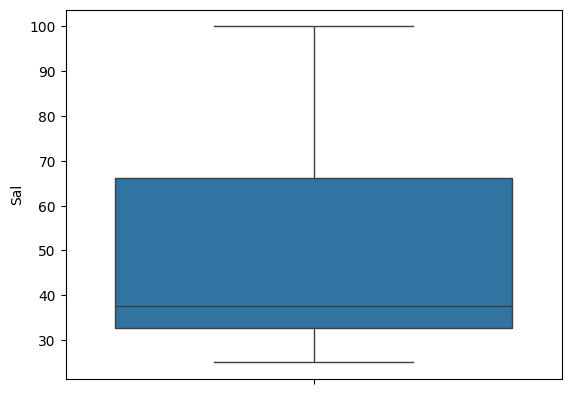

In [169]:
sns.boxplot(df3['Sal'])

In [145]:
# Assignment

In [146]:
import pandas as pd

In [154]:
df=pd.read_csv('csv/diabetes.csv',index_col='Sl.No')

In [155]:
df.head(3)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
Sl.No,,,,,,,,,
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1


In [156]:
# find anomilies

In [167]:
df['pregnant'].isna().sum()

np.int64(1)

In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
glucose,768.0,120.566406,33.190074,-126.000,99.00000,117.0000,140.25000,199.00
pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.563802,16.022754,-26.000,24.00000,29.0000,41.00000,329.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [176]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  767 non-null    str    
 1   glucose   768 non-null    int64  
 2   pressure  768 non-null    int64  
 3   triceps   768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   mass      768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   diabetes  768 non-null    int64  
dtypes: float64(2), int64(6), str(1)
memory usage: 54.1 KB


In [220]:
#df['pregnant'].fillna(pd.Series(df['pregnant']).mean())
df[df['pregnant']=='?']['pregnant']=np.nan
sp='!@#$%^&\/?'

In [236]:
preg_t = lambda x: np.nan if isinstance(x, str) and x in '!@#$%^&\/?' else x
#df['pregnant']=df['pregnant'].replace(sp,np.nan,inplace=True)
#df[df['pregnant'] in sp]['pregnant']

In [240]:
#pd.to_numeric(df['pregnant'])
preg_t('@')

nan

In [241]:
df['pregnant']=df['pregnant'].apply(preg_t)

In [242]:
df[df['pregnant']=='@']['pregnant']

Series([], Name: pregnant, dtype: str)

In [243]:
pd.to_numeric(df['pregnant'])

Sl.No
1       6.0
2       1.0
3       8.0
4       1.0
5       0.0
       ... 
764    10.0
765     2.0
766     5.0
767     1.0
768     1.0
Name: pregnant, Length: 768, dtype: float64